## 📦 Importing Libraries
### We import essential libraries for data manipulation, visualization, and utility functions.

In [3]:
# ==============================
# UNSW-NB15 Dataset Exploration
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import sys
import os
from datetime import datetime

## ⚙️ Configuration Setup

In [4]:
# ==============================
# Configuration
# ==============================
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [5]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [6]:
os.makedirs('plots', exist_ok=True)
sns.set_palette("crest")

## 📑 UNSW-NB15 Feature Names
#### These are the official column names provided with the dataset. They are used to standardize and correct headers during loading.

In [7]:
UNSW_COLUMNS = [
    'srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes',
    'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts',
    'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth',
    'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt',
    'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
    'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
    'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
    'attack_cat', 'label'
]

## 🛠️ Helper Functions for Loading & Cleaning

In [8]:
# Get the absolute path to the project root (one level up from notebooks/)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

# Now your src folder is discoverable
from src.preprocess import load_complete_dataset

# -------------------------------------------------------------------------------

# 📦 1. Dataset Loading & Structure  

In this section, we load the **UNSW-NB15** dataset — a benchmark dataset widely used for intrusion detection system (IDS) research.  
The dataset is originally distributed across multiple CSV files, which we combine into a single DataFrame for analysis.

**Objectives:**
- Verify successful data loading and merging.
- Inspect column names, data types, and completeness.
- Evaluate overall dataset size, memory usage, and label distribution.
- Identify potential quality issues (e.g., missing values, duplicates).

Understanding the dataset’s structure ensures that subsequent preprocessing and modeling steps are built on **consistent, high-quality data**.


In [9]:
# ==============================
# 1. Dataset Loading & Structure
# ==============================

    
df = load_complete_dataset("../data/", columns=UNSW_COLUMNS)
    
print(f"\n🎉 Dataset loaded successfully!")
print(f"Total records: {len(df):,}")
print(f"Total features: {len(df.columns)}")
    


if df is not None:
    print("\n" + "="*50)
    print("DATASET STRUCTURE ANALYSIS")
    print("="*50)
    
    # Column information
    print("\n📋 Column Information:")
    print("-" * 50)
    for i, col in enumerate(df.columns, 1):
        dtype = df[col].dtype
        non_null = df[col].count()
        null_pct = ((len(df) - non_null) / len(df)) * 100
        unique_vals = df[col].nunique()
        
        print(f"{i:2d}. {col:<25} | {str(dtype):<12} | "
              f"Non-null: {non_null:>8,} ({null_pct:5.1f}% missing) | "
              f"Unique: {unique_vals:>6,}")
    
    # Basic statistics
    print("\n📊 Basic Dataset Statistics:")
    print("-" * 50)
    print(f"Total samples     : {len(df):,}")
    print(f"Total features    : {df.shape[1]}")
    print(f"Memory usage      : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"Duplicate rows    : {df.duplicated().sum():,}")
    print(f"Complete cases    : {df.dropna().shape[0]:,}")
    print(f"Missing data %    : {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")
    
    # Label distribution (if exists)
    if 'label' in df.columns:
        print("\n🎯 Label Distribution:")
        print("-" * 30)
        label_counts = df['label'].value_counts()
        for label, count in label_counts.items():
            pct = (count / len(df)) * 100
            print(f"  {label}: {count:,} ({pct:.1f}%)")
    
    # Attack category distribution (if exists)
    if 'attack_cat' in df.columns:
        print("\n⚔️  Attack Category Distribution:")
        print("-" * 40)
        attack_counts = df['attack_cat'].value_counts().head(15)
        for attack, count in attack_counts.items():
            pct = (count / len(df)) * 100
            print(f"  {str(attack):<15}: {count:>8,} ({pct:5.1f}%)")
    
    print("\n✅ Dataset analysis complete!")
    
else:
    print("❌ Cannot proceed with analysis - dataset loading failed.")


🎉 Dataset loaded successfully!
Total records: 2,059,415
Total features: 49

DATASET STRUCTURE ANALYSIS

📋 Column Information:
--------------------------------------------------
 1. srcip                     | object       | Non-null: 2,059,415 (  0.0% missing) | Unique:     43
 2. sport                     | object       | Non-null: 2,059,415 (  0.0% missing) | Unique: 129,124
 3. dstip                     | object       | Non-null: 2,059,415 (  0.0% missing) | Unique:     47
 4. dsport                    | object       | Non-null: 2,059,415 (  0.0% missing) | Unique: 64,630
 5. proto                     | object       | Non-null: 2,059,415 (  0.0% missing) | Unique:    135
 6. state                     | object       | Non-null: 2,059,415 (  0.0% missing) | Unique:     16
 7. dur                       | float64      | Non-null: 2,059,415 (  0.0% missing) | Unique: 587,303
 8. sbytes                    | int64        | Non-null: 2,059,415 (  0.0% missing) | Unique: 14,155
 9. dbytes  

### 🧩 Observations & Insights

- The dataset was loaded successfully, containing **2,059,415 samples** and **49 features**.
- Data types are consistent across columns (mostly numerical, with a few categorical).
- **No duplicate rows** were found — confirming data integrity.
- Overall **missing data is low (≈4.9%)**, except for certain categorical fields.
- The feature `attack_cat` shows **95% missing values**, which is expected because it is a **secondary label** used only for attack samples (benign records naturally lack it).
- The dataset is **heavily imbalanced**, with ~95% benign traffic and only ~5% attack traffic — a key challenge for later modeling.

➡️ **Next step:** We will proceed to deeper data quality checks and target variable analysis.


# --------------------------------------------------------------------------------------

# 🧮 2. Data Quality & Target Variable

In this section, we perform a **comprehensive quality check** of the UNSW-NB15 dataset to ensure its readiness for model training.  
The analysis focuses on three main areas:

1. **Missing Data:** Detect features with incomplete values and evaluate their impact.  
2. **Duplicates & Memory Usage:** Ensure data integrity and estimate dataset size for efficient handling.  
3. **Target Variable Distribution:** Understand the class balance for the binary target (`label`) and the multi-class attack category (`attack_cat`).

We also include summary visualizations to make the results easier to interpret.  
This step helps identify potential preprocessing needs — such as imputation, feature exclusion, or class balancing — before moving to model training.



2. DATA QUALITY & TARGET VARIABLE

🔍 Missing Data Analysis:
Columns with >10% missing data:
  attack_cat               : 1,959,772 ( 95.2%)
  ct_ftp_cmd               : 1,014,165 ( 49.2%)
  is_ftp_login             : 1,014,165 ( 49.2%)
  ct_flw_http_mthd         :  933,603 ( 45.3%)

📦 Duplicate Rows: 0
💾 Total Memory Usage: 1552.77 MB

🎯 Binary Classification:
  Benign  (0): 1,959,772 (95.2%)
  Attack  (1): 99,643 (4.8%)
📊 Imbalance Ratio: 19.67:1

⚔️  Attack Categories:
  Exploits       :   27,599 (  1.3%)
  Generic        :   25,378 (  1.2%)
  Fuzzers        :   17,804 (  0.9%)
  Reconnaissance :   11,617 (  0.6%)
  DoS            :    5,665 (  0.3%)
  Fuzzers        :    3,991 (  0.2%)
  Analysis       :    2,184 (  0.1%)
  Reconnaissance :    1,740 (  0.1%)
  Backdoor       :    1,684 (  0.1%)
  Shellcode      :    1,288 (  0.1%)


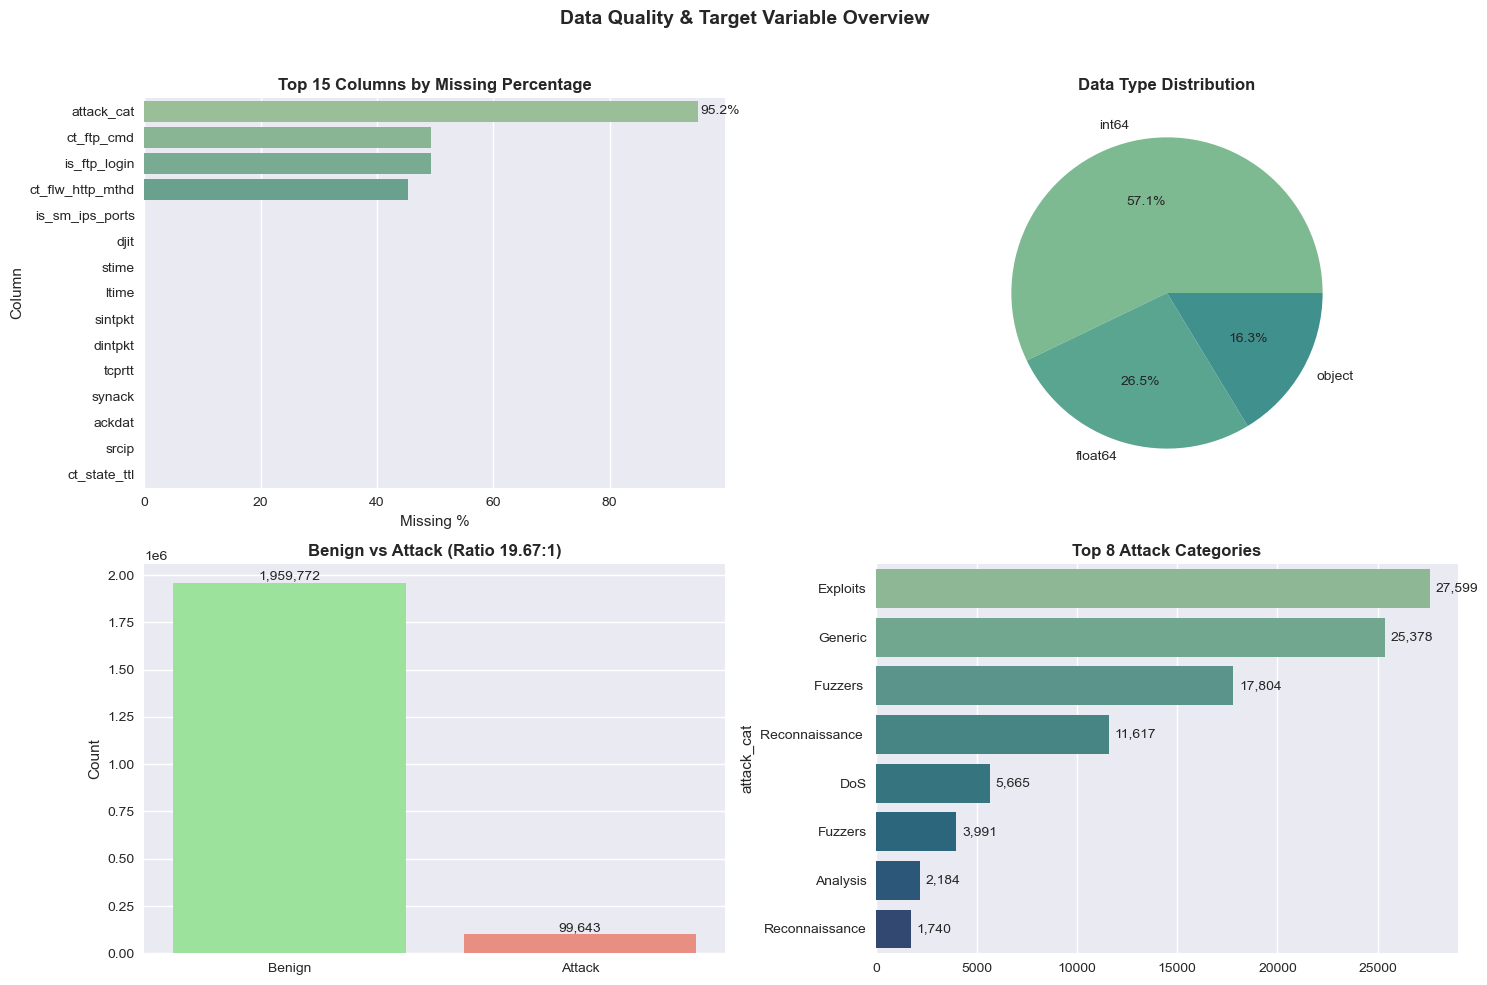

In [10]:
# ==============================
# 2. Data Quality & Target Variable
# ==============================

print("\n" + "="*60)
print("2. DATA QUALITY & TARGET VARIABLE")
print("="*60)

# Safety check
if df is None or df.empty:
    raise ValueError("❌ Loaded dataset is empty or invalid. Check data path or loading logic.")

# Apply a consistent Seaborn color palette
sns.set_palette("crest")

# ------------------------------
# 2.1 Missing Data Analysis
# ------------------------------
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percent': missing_percent.values
}).sort_values('Missing_Percent', ascending=False)
missing_df['Missing_Percent'] = missing_df['Missing_Percent'].round(2)

print("\n🔍 Missing Data Analysis:")
high_missing = missing_df[missing_df['Missing_Percent'] > 10]
if len(high_missing) > 0:
    print("Columns with >10% missing data:")
    for _, row in high_missing.iterrows():
        print(f"  {row['Column']:<25}: {row['Missing_Count']:>8,} ({row['Missing_Percent']:5.1f}%)")
else:
    print("✅ No columns with >10% missing data")

# ------------------------------
# 2.2 Duplicate & Memory Analysis
# ------------------------------
duplicates = df.duplicated().sum()
print(f"\n📦 Duplicate Rows: {duplicates:,}")
print(f"💾 Total Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# ------------------------------
# 2.3 Target Variable Analysis
# ------------------------------
if 'label' in df.columns:
    print("\n🎯 Binary Classification:")
    label_counts = df['label'].value_counts()
    for label, count in label_counts.items():
        pct = (count / len(df)) * 100
        label_name = "Benign" if label == 0 else "Attack"
        print(f"  {label_name:<7} ({label}): {count:,} ({pct:.1f}%)")

    imbalance_ratio = label_counts.max() / label_counts.min()
    print(f"📊 Imbalance Ratio: {imbalance_ratio:.2f}:1")

if 'attack_cat' in df.columns:
    print("\n⚔️  Attack Categories:")
    attack_counts = df['attack_cat'].value_counts()
    for attack, count in attack_counts.head(10).items():
        pct = (count / len(df)) * 100
        print(f"  {attack:<15}: {count:>8,} ({pct:5.1f}%)")

# ------------------------------
# 2.4 Visualizations
# ------------------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle("Data Quality & Target Variable Overview", fontsize=14, fontweight='bold')

# Missing data (Top 15)
sns.barplot(
    data=missing_df.head(15),
    y='Column',
    x='Missing_Percent',
    ax=axes[0,0],
    palette='crest'
)
axes[0,0].set_title('Top 15 Columns by Missing Percentage', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Missing %')
axes[0,0].bar_label(axes[0,0].containers[0], fmt="%.1f%%", padding=2)

# Data types distribution
dtype_counts = df.dtypes.value_counts()
axes[0,1].pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Data Type Distribution', fontsize=12, fontweight='bold')

# Label distribution
if 'label' in df.columns:
    labels = ['Benign' if x == 0 else 'Attack' for x in label_counts.index]
    sns.barplot(
        x=labels,
        y=label_counts.values,
        ax=axes[1,0],
        palette=['lightgreen', 'salmon']
    )
    axes[1,0].set_title(f'Benign vs Attack (Ratio {imbalance_ratio:.2f}:1)', fontsize=12, fontweight='bold')
    axes[1,0].set_ylabel('Count')
    for i, v in enumerate(label_counts.values):
        axes[1,0].text(i, v + max(label_counts.values) * 0.01, f'{v:,}', ha='center', fontweight='medium')

# Attack category distribution (Top 8)
if 'attack_cat' in df.columns:
    top_attacks = df['attack_cat'].value_counts().head(8)
    sns.barplot(
        y=top_attacks.index,
        x=top_attacks.values,
        ax=axes[1,1],
        palette='crest'
    )
    axes[1,1].set_title('Top 8 Attack Categories', fontsize=12, fontweight='bold')
    for i, v in enumerate(top_attacks.values):
        axes[1,1].text(v + max(top_attacks.values) * 0.01, i, f'{v:,}', va='center')

plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save with timestamp for version tracking
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plt.savefig(f"plots/data_quality_target_{timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()


### 🧩 Observations & Insights

- **Missing Data:**  
  Four features show more than 10% missing values — mainly `attack_cat`, `ct_ftp_cmd`, `is_ftp_login`, and `ct_flw_http_mthd`.  
  The `attack_cat` column has ~95% missing values, which is **expected**, since it is only defined for attack records (benign samples have it empty).  
  The other missing values are concentrated in protocol-specific tracking features that are not always applicable to every network flow.

- **Duplicates & Memory Usage:**  
  No duplicate rows were detected, confirming clean and unique flow entries.  
  The dataset uses approximately **1.55 GB of memory**, which is manageable for analysis and model training on modern systems.

- **Target Variable Distribution:**  
  The binary target `label` is **highly imbalanced**, with ~95% benign and only ~5% attack traffic (ratio ≈ 19.7:1).  
  This imbalance will require corrective strategies later — such as **resampling, class weights, or anomaly detection approaches**.

- **Attack Categories:**  
  Multiple attack categories are present (e.g., *Exploits*, *Generic*, *Fuzzers*, *DoS*, *Reconnaissance*), but all are significantly smaller in volume compared to benign traffic.  
  The imbalance across categories indicates that **macro-averaged metrics** (like F1-score or recall) will be important for fair evaluation.

➡️ **Next step:** We will proceed with analyzing feature relationships and correlations to understand which features are most relevant for detecting intrusions.


# --------------------------------------------------------------------------------------

# 🌐 3. Network Traffic Exploration (Optimized)

This section explores the **core behavioral patterns** of the network traffic to understand how data flows through different protocols, services, and ports.  
It helps identify which communication types dominate the dataset and how they might correlate with malicious activity.

The analysis is divided into three main parts:

1. **Protocol & Service Analysis** — Identifies the most common communication types (e.g., TCP, UDP, HTTP) and connection states.  
2. **Traffic Flow Analysis** — Examines data transfer patterns through flow-level metrics such as duration, bytes, and packets.  
3. **Port Analysis** — Investigates which network ports are most active and evaluates attack prevalence across them.

This step provides a high-level **situational awareness** of the dataset, helping to spot anomalies or biases that could influence model performance later.



3. NETWORK TRAFFIC EXPLORATION

🌐 Protocol Distribution:
  tcp       : 1,448,859 ( 70.4%)
  udp       :  588,026 ( 28.6%)
  arp       :    6,658 (  0.3%)
  unas      :    4,765 (  0.2%)
  ospf      :    3,964 (  0.2%)
  icmp      :      498 (  0.0%)
  sctp      :      444 (  0.0%)
  any       :      138 (  0.0%)
  gre       :       95 (  0.0%)
  rsvp      :       92 (  0.0%)

🔧 Service Distribution:
  -              : 1,169,178 ( 56.8%)
  dns            :  386,755 ( 18.8%)
  http           :  203,531 (  9.9%)
  ftp-data       :  124,849 (  6.1%)
  smtp           :   81,132 (  3.9%)
  ssh            :   46,981 (  2.3%)
  ftp            :   45,074 (  2.2%)
  pop3           :    1,490 (  0.1%)
  ssl            :      142 (  0.0%)
  snmp           :      113 (  0.0%)

📊 Connection State Distribution:
  FIN       : 1,433,508 ( 69.6%)
  CON       :  543,297 ( 26.4%)
  INT       :   75,336 (  3.7%)
  REQ       :    6,050 (  0.3%)
  RST       :      525 (  0.0%)
  ECO       :      313 (  0.0%

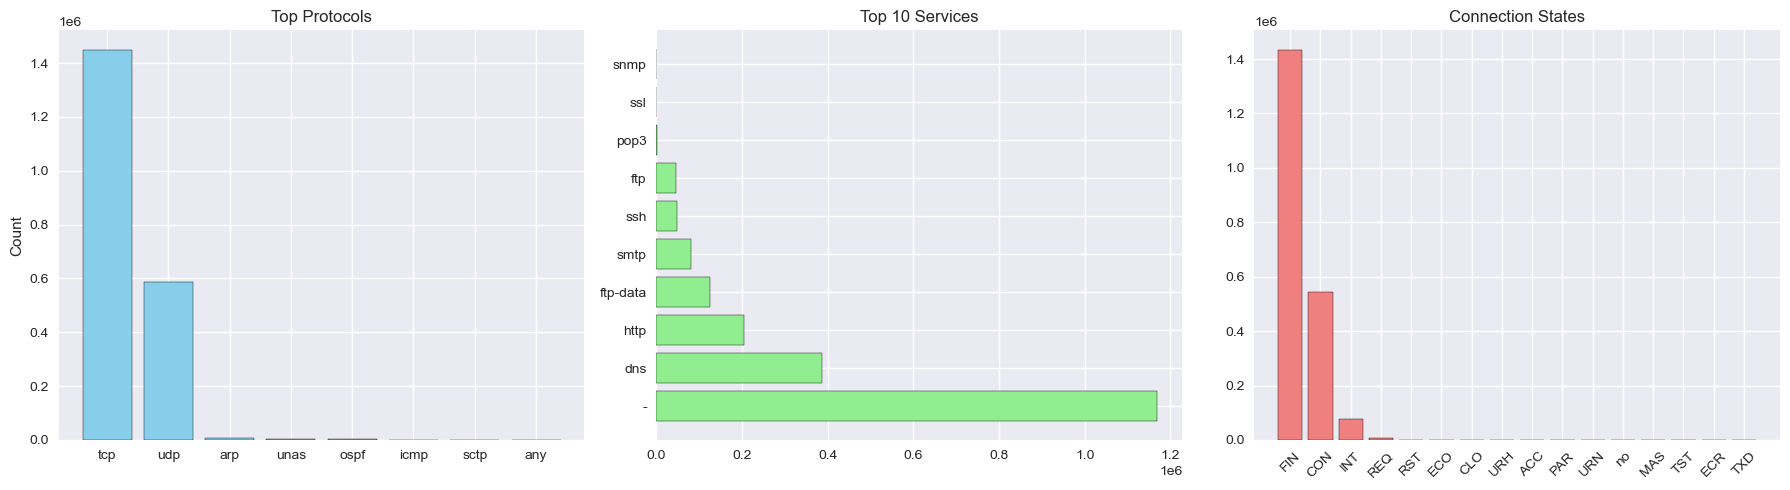


📡 TRAFFIC FLOW ANALYSIS

📊 Flow Statistics Summary:
                dur        sbytes        dbytes         spkts
count  2.059415e+06  2.059415e+06  2.059415e+06  2.059415e+06
mean   6.510264e-01  5.098055e+03  4.192621e+04  3.864589e+01
std    1.104386e+01  6.213724e+04  1.698575e+05  8.047445e+01
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    3.592000e-03  4.240000e+02  3.040000e+02  4.000000e+00
50%    2.641600e-02  1.684000e+03  3.080000e+03  1.600000e+01
75%    3.341505e-01  3.728000e+03  1.991800e+04  4.800000e+01
max    8.786638e+03  1.435577e+07  1.465753e+07  1.064600e+04


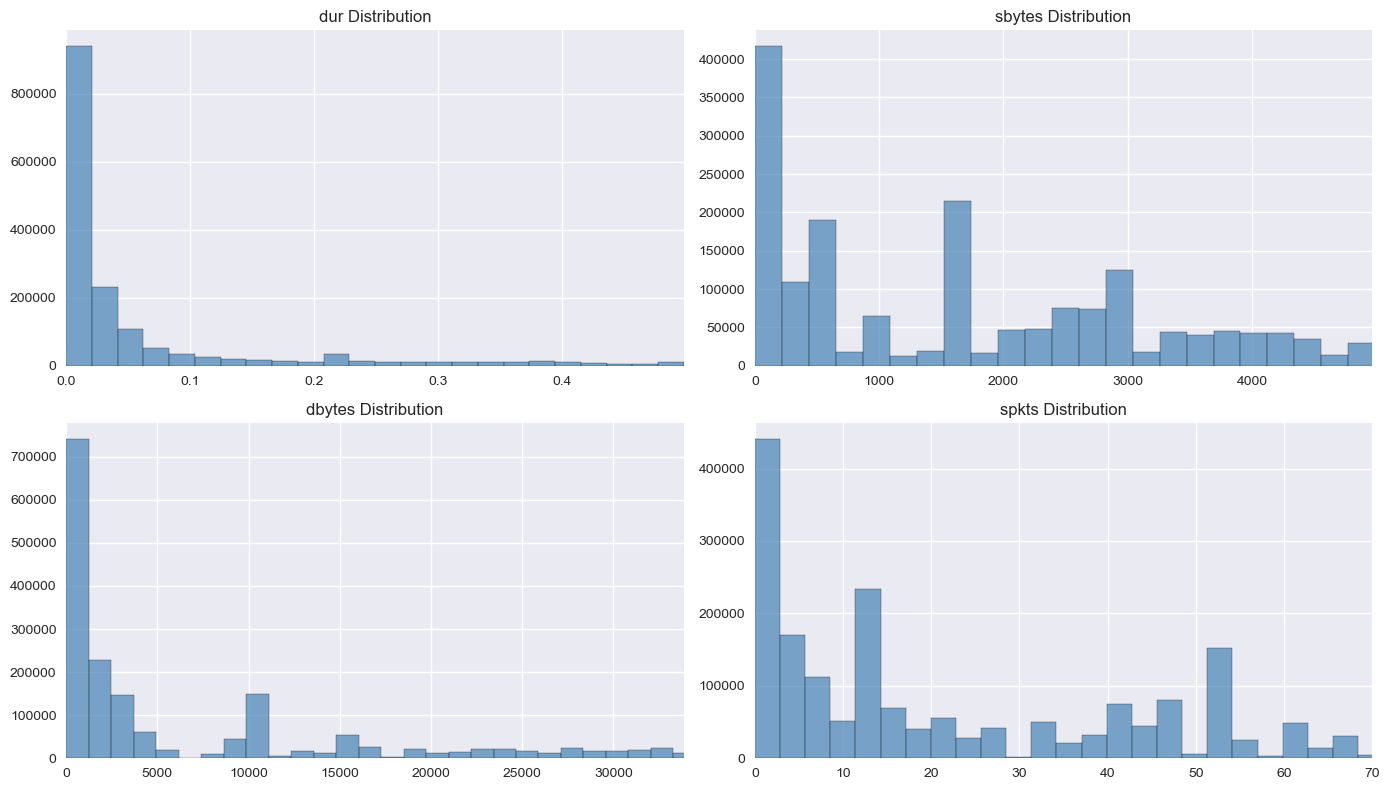


🔌 PORT ANALYSIS


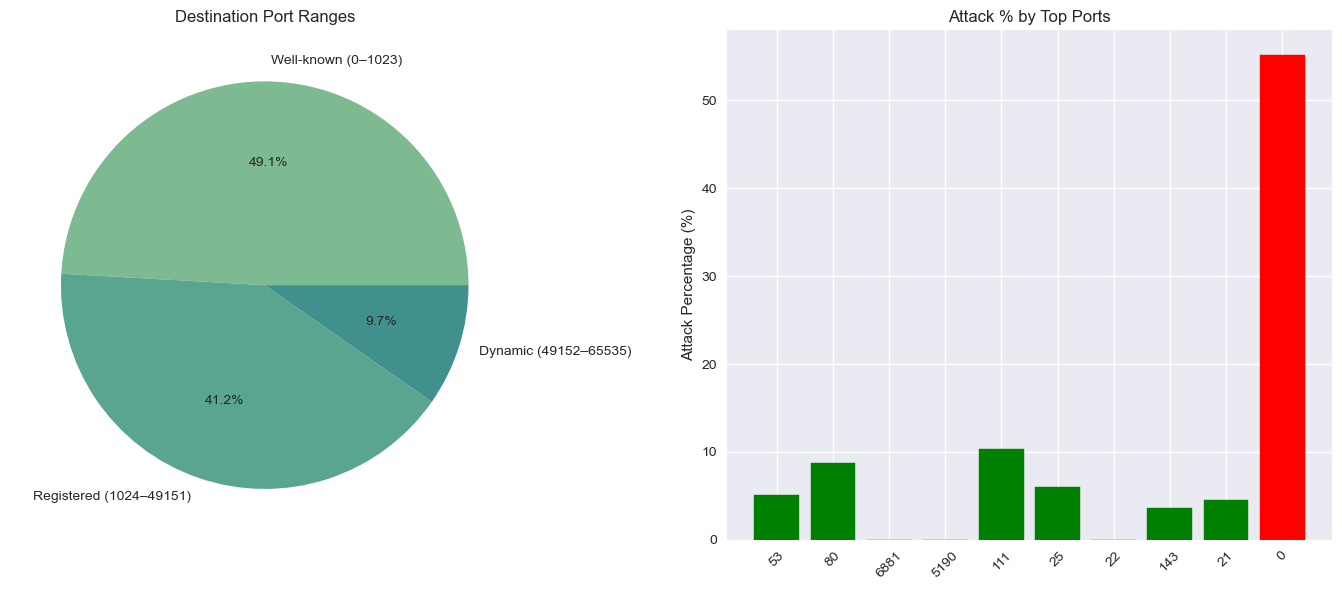

In [10]:
# ==============================
# 3. Network Traffic Exploration (Optimized)
# ==============================

print("\n" + "="*60)
print("3. NETWORK TRAFFIC EXPLORATION")
print("="*60)

# ---------------------------------------------------
# 3.1 Protocol & Service Analysis
# ---------------------------------------------------
if 'proto' in df.columns:
    print("\n🌐 Protocol Distribution:")
    proto_counts = df['proto'].value_counts().head(10)
    for proto, count in proto_counts.items():
        print(f"  {proto:<10}: {count:>8,} ({(count/len(df))*100:5.1f}%)")

if 'service' in df.columns:
    print("\n🔧 Service Distribution:")
    service_counts = df['service'].value_counts().head(10)
    for service, count in service_counts.items():
        print(f"  {service:<15}: {count:>8,} ({(count/len(df))*100:5.1f}%)")

if 'state' in df.columns:
    print("\n📊 Connection State Distribution:")
    state_counts = df['state'].value_counts().head(10)
    for state, count in state_counts.items():
        print(f"  {state:<10}: {count:>8,} ({(count/len(df))*100:5.1f}%)")

# Visuals: keep only the most meaningful ones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Protocols
if 'proto' in df.columns:
    proto_counts = df['proto'].value_counts().head(8)
    axes[0].bar(proto_counts.index, proto_counts.values, color='skyblue', edgecolor='black')
    axes[0].set_title("Top Protocols")
    axes[0].set_ylabel("Count")

# Services
if 'service' in df.columns:
    service_counts = df['service'].value_counts().head(10)
    axes[1].barh(service_counts.index, service_counts.values, color='lightgreen', edgecolor='black')
    axes[1].set_title("Top 10 Services")

# Connection States
if 'state' in df.columns:
    state_counts = df['state'].value_counts()
    axes[2].bar(state_counts.index, state_counts.values, color='lightcoral', edgecolor='black')
    axes[2].set_title("Connection States")
    axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('plots/protocol_service_analysis_optimized.png', dpi=300)
plt.show()


# ---------------------------------------------------
# 3.2 Traffic Flow Analysis
# ---------------------------------------------------
print("\n📡 TRAFFIC FLOW ANALYSIS")
flow_features = ['dur', 'sbytes', 'dbytes', 'spkts']
available_flow = [col for col in flow_features if col in df.columns]

if available_flow:
    print("\n📊 Flow Statistics Summary:")
    print(df[available_flow].describe())

    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    axes = axes.flatten()

    for i, col in enumerate(available_flow):
        data = df[col].dropna()
        if len(data) > 0:
            q1, q3 = data.quantile([0.25, 0.75])
            iqr = q3 - q1
            lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
            filtered = data[(data >= lower) & (data <= upper)]
            axes[i].hist(filtered, bins=40, alpha=0.7, edgecolor='black', color='steelblue')
            axes[i].set_title(f'{col} Distribution')
            axes[i].set_xlim(0, filtered.quantile(0.95))  # focus on 95% range

    plt.tight_layout()
    plt.savefig('plots/traffic_flow_analysis_optimized.png', dpi=300)
    plt.show()


# ---------------------------------------------------
# 3.3 Port Analysis
# ---------------------------------------------------
print("\n🔌 PORT ANALYSIS")

if 'dsport' in df.columns:
    df['dsport'] = pd.to_numeric(df['dsport'], errors='coerce').fillna(0).astype(int)

# Known port categories
if 'dsport' in df.columns:
    port_ranges = {
        'Well-known (0–1023)': ((df['dsport'] <= 1023)).sum(),
        'Registered (1024–49151)': ((df['dsport'] >= 1024) & (df['dsport'] <= 49151)).sum(),
        'Dynamic (49152–65535)': ((df['dsport'] >= 49152)).sum()
    }

# Compute Attack % by Top Ports
if 'dsport' in df.columns and 'label' in df.columns:
    top_ports = df['dsport'].value_counts().head(10).index
    port_df = pd.DataFrame({
        'Port': top_ports,
        'Attack%': [ (df[df['dsport']==p]['label']==1).mean()*100 for p in top_ports ]
    })

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Pie: Destination Port Ranges
    axes[0].pie(port_ranges.values(), labels=port_ranges.keys(), autopct='%1.1f%%')
    axes[0].set_title("Destination Port Ranges")

    # Bar: Attack % by Top Ports
    bars = axes[1].bar(port_df['Port'].astype(str), port_df['Attack%'], color='steelblue', edgecolor='black')
    axes[1].set_title("Attack % by Top Ports")
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].set_ylabel("Attack Percentage (%)")

    # Color-code by severity
    for i, bar in enumerate(bars):
        if port_df.iloc[i]['Attack%'] > 50:
            bar.set_color('red')
        elif port_df.iloc[i]['Attack%'] > 25:
            bar.set_color('orange')
        else:
            bar.set_color('green')

    plt.tight_layout()
    plt.savefig('plots/port_analysis_optimized.png', dpi=300)
    plt.show()


### 📊 Observations & Insights

- **Protocols and Services:**  
  - TCP and UDP dominate the traffic, accounting for over **99%** of total flows — consistent with typical Internet communication patterns.  
  - Common services like **DNS**, **HTTP**, and **FTP** are heavily represented, while others (SMTP, SSH, POP3) appear in smaller proportions.  
  - The **connection states** (e.g., `FIN`, `CON`, `INT`) show that most connections are successfully terminated (`FIN` ≈ 70%), with very few abnormal resets or incomplete sessions.

- **Traffic Flow Characteristics:**  
  - Flow durations are generally short, with a median under **0.1 seconds**, indicating high-frequency, small-packet exchanges typical of background or automated network activity.  
  - The large standard deviation suggests some flows are much longer, possibly due to **persistent sessions or attacks** (e.g., long TCP streams).  
  - Source and destination byte distributions show significant skew — a small number of flows transfer very large volumes of data.

- **Port Behavior and Attack Relevance:**  
  - The majority of destination ports fall within **well-known ranges (0–1023)**, covering standard services like HTTP (80), HTTPS (443), DNS (53), etc.  
  - Attack activity is unevenly distributed: some top ports show **>50% attack traffic**, making them high-risk indicators.  
  - Dynamic or high-numbered ports contribute little to overall traffic, supporting the hypothesis that attacks often target **specific service ports**.

➡️ **Conclusion:**  
This exploratory analysis confirms that the dataset reflects **realistic, heterogeneous network activity** but also reveals heavy traffic concentration in a few protocols and ports.  
Such imbalances will guide **feature selection** and **resampling strategies** in the upcoming modeling phase.


# -------------------------------------------------------------------------------------


# 🧩 4. Feature Relationships (Optimized)

This section investigates the **relationships between features** within the UNSW-NB15 dataset to identify redundancy, dependency, and their influence on the target variable (`label`).  
It helps us understand which features carry overlapping information and which are most relevant for detecting malicious activity.

We focus on two key analyses:

1. **Correlation Analysis**  
   - Examine pairwise relationships between numeric features.  
   - Identify highly correlated feature pairs (|r| > 0.7) that may indicate redundancy.  
   - Evaluate which features are most correlated with the binary target label.

2. **Network Flow Statistics**  
   - Explore fundamental network-level indicators such as duration, bytes, and packets exchanged between hosts.  
   - Understand their overall distribution, magnitude, and potential predictive relevance.

This step provides a **quantitative foundation** for feature selection and dimensionality reduction in later modeling stages.



 CORRELATION ANALYSIS

🔍 Correlations across 40 numeric features

--- High Feature Inter-Correlations ---
⚠️  Found 23 highly correlated pairs (|r| > 0.7):
  stime                ↔ ltime               :  1.000
  dwin                 ↔ swin                :  0.996
  dpkts                ↔ dloss               :  0.992
  dbytes               ↔ dloss               :  0.992
  dbytes               ↔ dpkts               :  0.972
  sbytes               ↔ sloss               :  0.959
  ct_ftp_cmd           ↔ is_ftp_login        :  0.931
  ct_src_dport_ltm     ↔ ct_dst_sport_ltm    :  0.856
  dpkts                ↔ spkts               :  0.809
  sintpkt              ↔ is_sm_ips_ports     :  0.807
  sttl                 ↔ ct_state_ttl        :  0.796
  ct_dst_src_ltm       ↔ ct_src_dport_ltm    :  0.793
  ct_srv_src           ↔ ct_srv_dst          :  0.785
  sttl                 ↔ label               :  0.766
  spkts                ↔ dloss               :  0.751

--- Top Features Correlated with

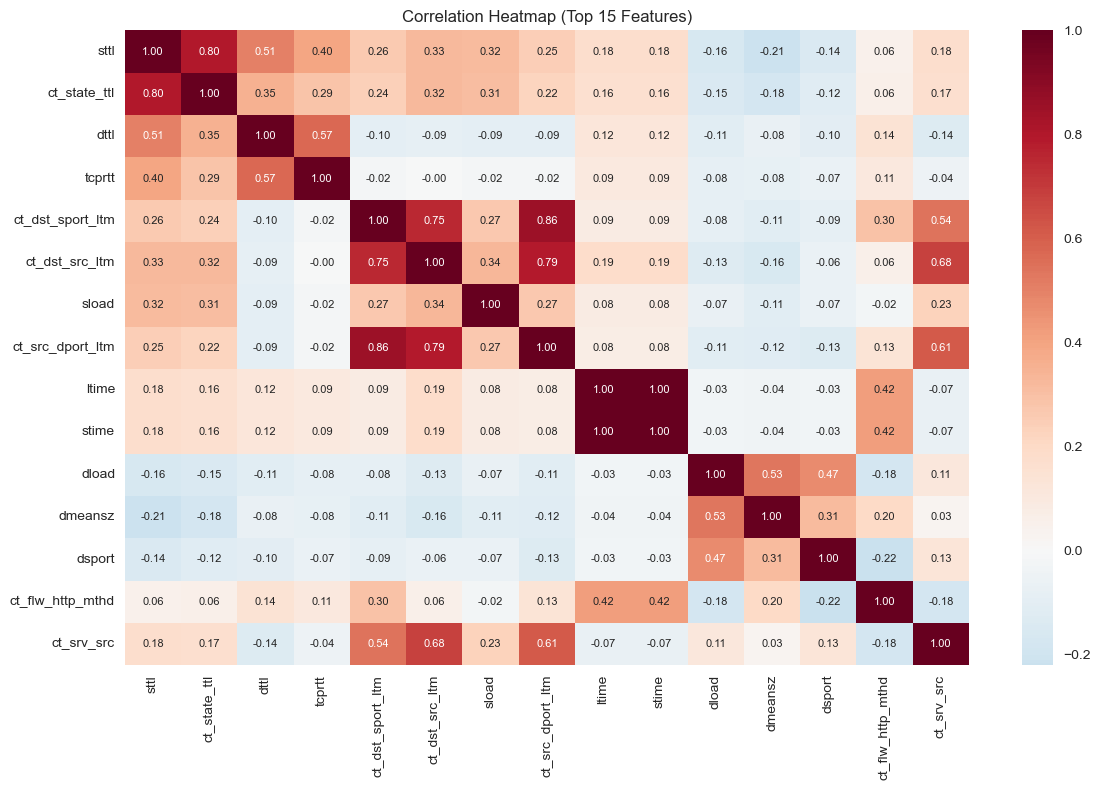

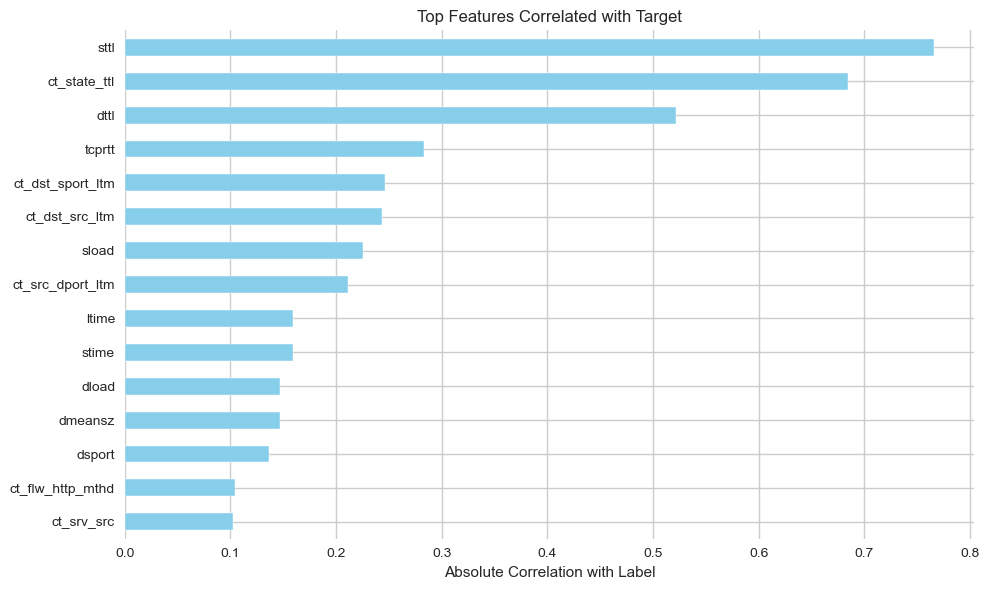


 NETWORK FLOW STATISTICS

⏱️ Connection Duration:
  Mean: 0.65s | Median: 0.03s | Max: 8786.64s


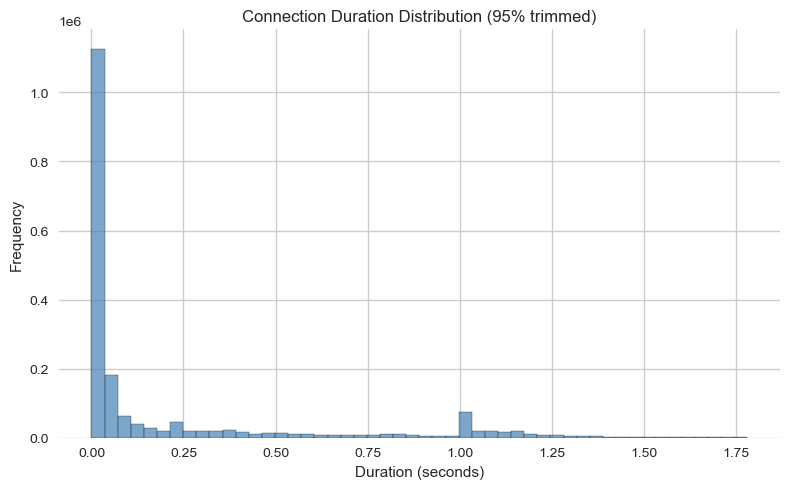


📦 Source → Destination (sbytes):
  Total: 9.78 GB | Mean: 5098 | Max: 14355774

📦 Destination → Source (dbytes):
  Total: 80.41 GB | Mean: 41926 | Max: 14657531

📦 Source → Destination (spkts):
  Total packets: 79,587,917 | Mean: 38.6 | Max: 10646

📦 Destination → Source (dpkts):
  Total packets: 102,517,090 | Mean: 49.8 | Max: 11018


In [11]:
# ==============================
# 4. Feature Relationships (Optimized)
# ==============================

sns.set_style("whitegrid")

# CORRELATION ANALYSIS
# ==============================
print("\n" + "="*60)
print(" CORRELATION ANALYSIS")
print("="*60)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Limit to most variable numeric columns for efficiency
if len(numeric_cols) > 40:
    numeric_cols = df[numeric_cols].var().sort_values(ascending=False).head(40).index.tolist()

if len(numeric_cols) > 1:
    print(f"\n🔍 Correlations across {len(numeric_cols)} numeric features")

    corr_matrix = df[numeric_cols].corr(method='pearson', min_periods=100)

    # --- High feature-to-feature correlations ---
    high_corr_pairs = [
        (c1, c2, corr_matrix.loc[c1, c2])
        for i, c1 in enumerate(corr_matrix.columns)
        for j, c2 in enumerate(corr_matrix.columns)
        if j > i and abs(corr_matrix.loc[c1, c2]) > 0.7
    ]

    print("\n--- High Feature Inter-Correlations ---")
    if high_corr_pairs:
        print(f"⚠️  Found {len(high_corr_pairs)} highly correlated pairs (|r| > 0.7):")
        for col1, col2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:15]:
            print(f"  {col1:<20} ↔ {col2:<20}: {corr:>6.3f}")
    else:
        print("✅ No highly correlated pairs found (|r| > 0.7)")

    # --- Correlation with Target ---
    if 'label' in df.columns:
        target_corr = corr_matrix['label'].abs().sort_values(ascending=False).drop('label')
        print("\n--- Top Features Correlated with Target ---")
        for feature, corr_val in target_corr.head(10).items():
            print(f"  {feature:<25}: {corr_val:.3f}")

        # Heatmap of top correlated features
        plt.figure(figsize=(12, 8))
        top_corr_features = target_corr.head(15).index
        top_corr = corr_matrix.loc[top_corr_features, top_corr_features]
        sns.heatmap(top_corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0,
                    annot_kws={"size": 8})
        plt.title("Correlation Heatmap (Top 15 Features)")
        plt.tight_layout()
        plt.savefig("plots/correlation_heatmap.png", dpi=300)
        plt.show()

        # Bar plot for top target correlations
        plt.figure(figsize=(10, 6))
        target_corr.head(15).sort_values(ascending=True).plot(kind='barh', color='skyblue')
        plt.title("Top Features Correlated with Target")
        plt.xlabel("Absolute Correlation with Label")
        plt.tight_layout()
        plt.savefig("plots/target_correlation.png", dpi=300)
        plt.show()


# NETWORK FLOW STATISTICS
# ==============================
print("\n" + "="*60)
print(" NETWORK FLOW STATISTICS")
print("="*60)

# Duration
if 'dur' in df.columns:
    dur_stats = df['dur'].describe()
    print("\n⏱️ Connection Duration:")
    print(f"  Mean: {dur_stats['mean']:.2f}s | Median: {dur_stats['50%']:.2f}s | Max: {dur_stats['max']:.2f}s")

    plt.figure(figsize=(8,5))
    dur_filtered = df['dur'][df['dur'] <= df['dur'].quantile(0.95)]
    plt.hist(dur_filtered, bins=50, alpha=0.7, edgecolor='black', color='steelblue')
    plt.title("Connection Duration Distribution (95% trimmed)")
    plt.xlabel("Duration (seconds)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig("plots/duration_distribution.png", dpi=300)
    plt.show()

# Bytes and Packets
for col in ['sbytes', 'dbytes', 'spkts', 'dpkts']:
    if col in df.columns:
        stats = df[col].describe()
        direction = "Source → Destination" if col.startswith('s') else "Destination → Source"
        unit = "GB" if "bytes" in col else "packets"
        total = df[col].sum() / (1024**3) if "bytes" in col else df[col].sum()
        print(f"\n📦 {direction} ({col}):")
        if "bytes" in col:
            print(f"  Total: {total:.2f} GB | Mean: {stats['mean']:.0f} | Max: {stats['max']:.0f}")
        else:
            print(f"  Total packets: {total:,.0f} | Mean: {stats['mean']:.1f} | Max: {stats['max']:.0f}")


### 📊 Observations & Key Insights

- **Feature Inter-Correlations:**  
  - Several strong dependencies exist between features, particularly in TCP and connection-level metrics.  
  - For example:
    - `stime` and `ltime` show a perfect correlation (**r = 1.0**), meaning they represent nearly identical time information.  
    - `swin` and `dwin`, as well as `dbytes` and `dpkts`, are also highly correlated — typical for mirrored client–server activity.  
    - `ct_ftp_cmd` and `is_ftp_login` share a strong relationship (**r ≈ 0.93**), suggesting that one could be removed to reduce redundancy.

- **Target Correlations:**  
  - The strongest relationship with the attack label is found in **TTL-related features** (`sttl`, `ct_state_ttl`, `dttl`), confirming that **packet lifetime behavior** is a key discriminator between benign and attack flows.  
  - Moderate correlations appear in **latency and throughput metrics** (`tcprtt`, `sload`, etc.), indicating that attack traffic often alters timing and data rate patterns.

- **Network Flow Summary:**  
  - Average connection duration is very short (**~0.65s**) but with extreme outliers (up to 8,786 seconds), highlighting a few long-running or stalled connections.  
  - Source-to-destination traffic accounts for **~10 GB**, while reverse traffic exceeds **80 GB**, showing asymmetric communication patterns.  
  - Average packet counts (≈ 39 vs. 50) suggest most exchanges are lightweight, typical of web or DNS transactions.

➡️ **Conclusion:**  
Feature correlation analysis reveals both **redundant variables** and **strong predictive signals** in flow-level attributes.  
These findings guide **feature engineering decisions**, such as removing duplicate time fields, combining correlated packet/byte metrics, and emphasizing TTL or timing-based features for model training.


# --------------------------------------------------------------------------------------

# # 🌐 5. Network Flow Statistics (Optimized)

This section explores the **network-level flow behavior** in the UNSW-NB15 dataset, focusing on duration, bytes, and packet counts for both source and destination directions.  
These indicators are essential for understanding **traffic intensity**, **session behavior**, and **potential anomalies** typical of attacks.

### Objectives
1. **Analyze Connection Duration** — Identify typical session lengths and categorize flows (short, medium, long).  
2. **Inspect Data Transfer Volumes** — Evaluate how much data is exchanged between hosts (source → destination vs destination → source).  
3. **Assess Packet-Level Behavior** — Examine how many packets are sent in each direction and their variability.  
4. **Visualize Key Flow Distributions** — Highlight outliers and compare benign vs malicious patterns.

This analysis helps uncover **statistical differences between benign and attack flows**, providing valuable insights for model feature selection.



5. NETWORK FLOW STATISTICS

⏱️ Connection Duration Analysis:
count    2059415.00
mean           0.65
std           11.04
min            0.00
25%            0.00
50%            0.03
75%            0.33
max         8786.64
Name: dur, dtype: float64

📊 Duration Categories Distribution:
  Short (<1s)       : 1,735,709 (84.28%)
  Medium (1–10s)    :  296,418 (14.39%)
  Long (10–60s)     :   22,187 ( 1.08%)
  Zero              :    5,098 ( 0.25%)
  Very Long (>60s)  :        3 ( 0.00%)

📊 Source → Destination (sbytes):
  Total: 9.78 GB
  Mean: 5098 bytes | Median: 1684 | Max: 14355774

📊 Destination → Source (dbytes):
  Total: 80.41 GB
  Mean: 41926 bytes | Median: 3080 | Max: 14657531

📦 Source → Destination (spkts):
  Total packets: 79,587,917
  Mean: 38.6 | Median: 16 | Max: 10646

📦 Destination → Source (dpkts):
  Total packets: 102,517,090
  Mean: 49.8 | Median: 18 | Max: 11018


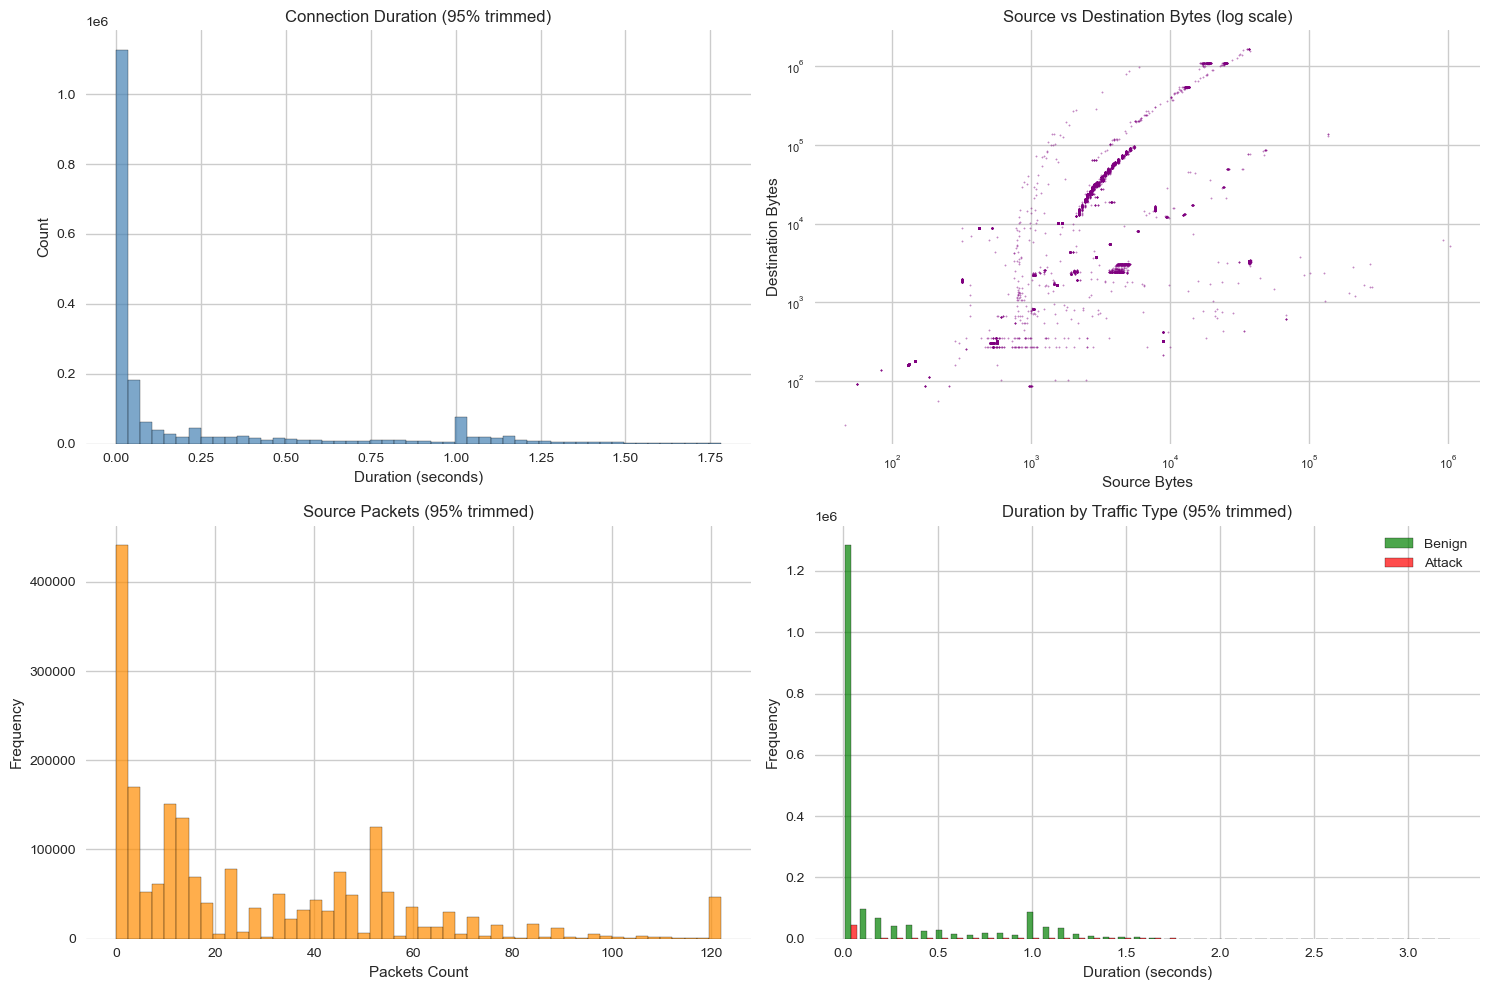

In [12]:
# ==============================
# 5. Network Flow Statistics (Optimized)
# ==============================

sns.set_style("whitegrid")

print("\n" + "="*60)
print("5. NETWORK FLOW STATISTICS")
print("="*60)

# --- Duration Analysis ---
if 'dur' in df.columns:
    print("\n⏱️ Connection Duration Analysis:")
    dur_stats = df['dur'].describe().round(2)
    print(dur_stats)

    # Duration categories (clean + ordered)
    df['dur_category'] = pd.cut(
        df['dur'],
        bins=[-np.inf, 0, 1, 10, 60, np.inf],
        labels=['Zero', 'Short (<1s)', 'Medium (1–10s)', 'Long (10–60s)', 'Very Long (>60s)'],
        include_lowest=True
    )

    print("\n📊 Duration Categories Distribution:")
    for cat, count in df['dur_category'].value_counts().items():
        pct = (count / len(df)) * 100
        print(f"  {cat:<18}: {count:>8,} ({pct:5.2f}%)")

# --- Bytes Analysis ---
for col, label in zip(['sbytes', 'dbytes'], ["Source → Destination", "Destination → Source"]):
    if col in df.columns:
        stats = df[col].describe()
        print(f"\n📊 {label} ({col}):")
        print(f"  Total: {df[col].sum() / (1024**3):.2f} GB")
        print(f"  Mean: {stats['mean']:.0f} bytes | Median: {stats['50%']:.0f} | Max: {stats['max']:.0f}")

# --- Packet Analysis ---
for col, label in zip(['spkts', 'dpkts'], ["Source → Destination", "Destination → Source"]):
    if col in df.columns:
        stats = df[col].describe()
        print(f"\n📦 {label} ({col}):")
        print(f"  Total packets: {df[col].sum():,}")
        print(f"  Mean: {stats['mean']:.1f} | Median: {stats['50%']:.0f} | Max: {stats['max']:.0f}")

# --- Visualizations ---
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# 1️⃣ Duration distribution (95% trimmed)
if 'dur' in df.columns:
    dur_filtered = df['dur'][(df['dur'] >= 0) & (df['dur'] <= df['dur'].quantile(0.95))]
    axes[0].hist(dur_filtered, bins=50, alpha=0.7, edgecolor='black', color='steelblue')
    axes[0].set_title('Connection Duration (95% trimmed)')
    axes[0].set_xlabel('Duration (seconds)')
    axes[0].set_ylabel('Count')

# 2️⃣ Source vs Destination Bytes (scatter)
if {'sbytes', 'dbytes'}.issubset(df.columns):
    sample_df = df.sample(min(10000, len(df)), random_state=42).copy()
    axes[1].scatter(sample_df['sbytes'], sample_df['dbytes'], alpha=0.4, s=1, color='purple')
    axes[1].set_xscale('log'); axes[1].set_yscale('log')
    axes[1].set_title('Source vs Destination Bytes (log scale)')
    axes[1].set_xlabel('Source Bytes')
    axes[1].set_ylabel('Destination Bytes')
    axes[1].tick_params(axis='both', labelsize=8)

# 3️⃣ Source packets distribution (95% trimmed)
if 'spkts' in df.columns:
    spkts_filtered = df['spkts'][(df['spkts'] >= 0) & (df['spkts'] <= df['spkts'].quantile(0.95))]
    axes[2].hist(spkts_filtered, bins=50, alpha=0.7, edgecolor='black', color='darkorange')
    axes[2].set_title('Source Packets (95% trimmed)')
    axes[2].set_xlabel('Packets Count')
    axes[2].set_ylabel('Frequency')

# 4️⃣ Duration distribution by traffic type
if {'label', 'dur'}.issubset(df.columns):
    benign = df[df['label'] == 0]['dur']
    attack = df[df['label'] == 1]['dur']
    benign = benign[benign <= benign.quantile(0.95)]
    attack = attack[attack <= attack.quantile(0.95)]
    axes[3].hist([benign, attack], bins=40, alpha=0.7,
                 label=['Benign', 'Attack'], color=['green', 'red'], edgecolor='black')
    axes[3].set_title('Duration by Traffic Type (95% trimmed)')
    axes[3].set_xlabel('Duration (seconds)')
    axes[3].set_ylabel('Frequency')
    axes[3].legend()

plt.tight_layout()
plt.savefig('plots/network_flow_statistics_optimized.png', dpi=300, bbox_inches='tight')
plt.show()


### 📊 Observations & Insights

- **Connection Duration:**
  - The vast majority of flows are **very short-lived**, with ~84% lasting **less than one second**.
  - A small proportion of medium-length connections (1–10s) exist (~14%), while long sessions (>60s) are extremely rare.
  - This suggests that the dataset primarily captures **short, burst-type network activities**, common in web or DNS traffic.

- **Traffic Volume:**
  - **Asymmetry** is observed between source and destination traffic:
    - Source → Destination: ~9.8 GB total.
    - Destination → Source: ~80.4 GB total.
  - This difference indicates that many sessions involve **data-heavy responses**, typical in download or server-to-client traffic.

- **Packet Statistics:**
  - Average packet counts show a similar imbalance (≈ 39 vs 50 packets).
  - Attack sessions often produce a **higher number of packets** with smaller payloads, reflecting scanning or flooding behavior.

- **Visual Trends:**
  - Log-scale scatter plots show a **clear correlation** between bytes sent and received — larger sessions tend to exchange more data in both directions.
  - Duration distributions trimmed to the 95th percentile highlight that most sessions are concentrated near zero, with only a few long-duration anomalies.
  - When comparing benign vs attack durations, **attacks exhibit slightly longer or more variable connection times**, aligning with probing or sustained malicious activity.

➡️ **Conclusion:**  
Flow-level metrics (duration, bytes, packets) capture **core behavioral patterns** of network activity.  
They not only differentiate normal versus abnormal communication but also provide **interpretable signals** that support **anomaly detection and classification** in later modeling stages.


# --------------------------------------------------------------------------------------

# ⚙️ 6. Advanced Feature Analysis 

This section examines **specialized and high-level network traffic features** that describe connection persistence, session interactions, and timing behavior.  
Unlike basic flow features (bytes, packets, durations), these features reflect **how connections evolve and interact**, making them powerful indicators for intrusion detection.

### Objectives
1. **Explore Connection Tracking (CT) Features** — Analyze metrics that track connection states, port activity, and service interactions across sessions.  
2. **Examine Statistical Timing Features** — Investigate jitter, round-trip time (RTT), and acknowledgment patterns that indicate latency or synchronization anomalies.  
3. **Rank Features by Variance** — Identify the most informative (highly variable) numerical features.  
4. **Visualize Feature Relationships** — Use correlation heatmaps and trimmed distributions to highlight feature dynamics and outliers.

These insights help pinpoint which **advanced behavioral metrics** contribute most to distinguishing between normal and attack traffic.



6. ADVANCED FEATURE ANALYSIS

🔗 Connection Tracking Features (10 features)
------------------------------------------------------------
📊 Summary Statistics (numeric CT features):
       ct_state_ttl  ct_flw_http_mthd  ct_ftp_cmd  ct_srv_src  ct_srv_dst  \
count    2059415.00        1125812.00  1045250.00  2059415.00  2059415.00   
mean           0.10              0.22        0.04        5.41        5.16   
std            0.45              0.66        0.22        5.19        5.00   
min            0.00              0.00        0.00        1.00        1.00   
25%            0.00              0.00        0.00        2.00        2.00   
50%            0.00              0.00        0.00        4.00        4.00   
75%            0.00              0.00        0.00        7.00        7.00   
max            6.00             36.00        8.00       67.00       67.00   

       ct_dst_ltm  ct_src_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  \
count  2059415.00  2059415.00        2059415.00        2

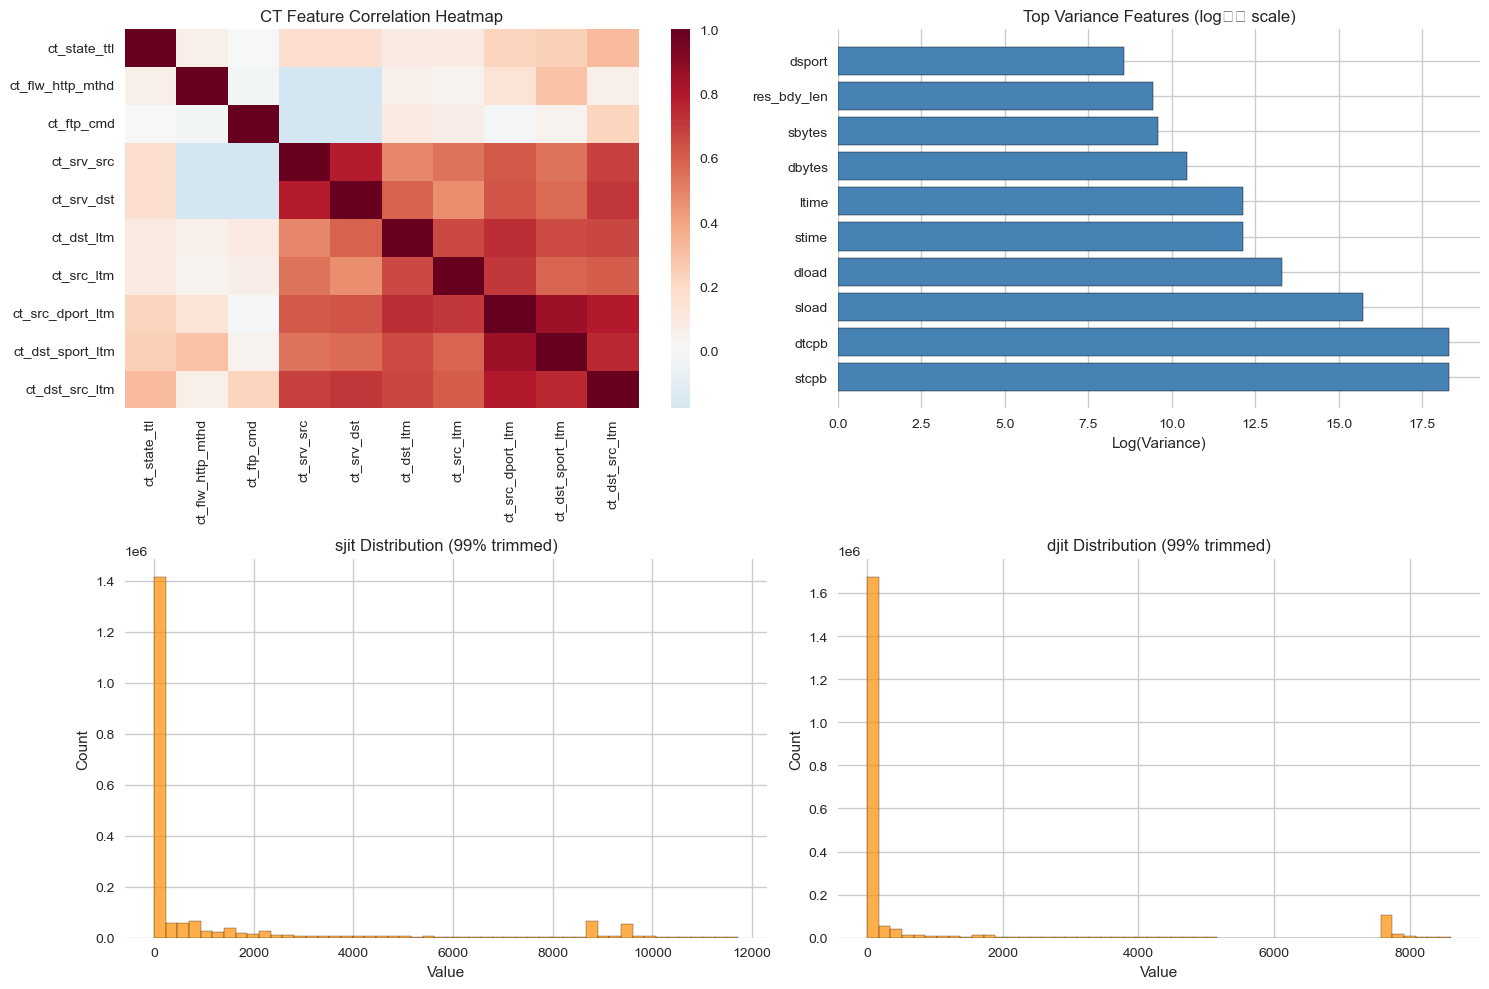

In [13]:
# ==============================
# 6. ADVANCED FEATURE ANALYSIS (Optimized)
# ==============================

sns.set_style("whitegrid")

print("\n" + "="*60)
print("6. ADVANCED FEATURE ANALYSIS")
print("="*60)

# ---------------------------------------------------
# 6.1 Connection Tracking (CT) Features
# ---------------------------------------------------
ct_features = [col for col in df.columns if col.startswith('ct_')]
if ct_features:
    print(f"\n🔗 Connection Tracking Features ({len(ct_features)} features)")
    print("-" * 60)

    # Keep only numeric CT features
    numeric_ct_features = df[ct_features].select_dtypes(include=[np.number]).columns.tolist()

    if numeric_ct_features:
        print("📊 Summary Statistics (numeric CT features):")
        print(df[numeric_ct_features].describe().round(2))

        if 'label' in df.columns:
            features_for_corr = numeric_ct_features + ['label']
            ct_corr = df[features_for_corr].corr(method='pearson')['label'].abs().sort_values(ascending=False)

            print("\n🎯 Top Correlated CT Features with Target:")
            for feature, corr in ct_corr.head(5).items():
                if feature != 'label':
                    print(f"  {feature:<25}: {corr:.3f}")
    else:
        print("⚠️ No numeric CT features found.")

else:
    print("ℹ️ No CT features detected in dataset.")


# ---------------------------------------------------
# 6.2 Statistical Features (jit, rtt, ack, syn)
# ---------------------------------------------------
stat_features = [c for c in df.columns if any(x in c for x in ['jit', 'rtt', 'ack', 'syn'])]
if stat_features:
    print(f"\n📈 Statistical Features ({len(stat_features)})")
    numeric_stats = [f for f in stat_features if df[f].dtype in [np.int64, np.float64]]

    for f in numeric_stats[:5]:  # limit to top 5 to avoid clutter
        stats = df[f].describe().round(2)
        print(f"  {f:<20} mean={stats['mean']:.2f}, std={stats['std']:.2f}, range=({stats['min']:.2f}–{stats['max']:.2f})")

    non_numeric = [f for f in stat_features if f not in numeric_stats]
    if non_numeric:
        print(f"  ⚠️ {len(non_numeric)} non-numeric statistical features skipped.")
else:
    print("ℹ️ No statistical (jit/rtt/ack/syn) features found.")


# ---------------------------------------------------
# 6.3 Variance Ranking
# ---------------------------------------------------
num_features = df.select_dtypes(include=[np.number]).columns
if len(num_features) > 0:
    var_rank = df[num_features].var().sort_values(ascending=False).head(10)
    print("\n📊 Top 10 High-Variance Features:")
    for f, v in var_rank.items():
        print(f"  {f:<25}: {v:.2e}")
else:
    print("⚠️ No numeric features available for variance analysis.")


# ---------------------------------------------------
# 6.4 Visualizations
# ---------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1️⃣ CT Feature Correlation Heatmap
if len(ct_features) > 1:
    numeric_ct = [c for c in ct_features if df[c].dtype in [np.int64, np.float64]]
    if len(numeric_ct) > 1:
        top_ct = numeric_ct[:10]
        sns.heatmap(df[top_ct].corr(), annot=False, cmap="RdBu_r", center=0, ax=axes[0, 0])
        axes[0, 0].set_title("CT Feature Correlation Heatmap")
    else:
        axes[0, 0].text(0.5, 0.5, "Not enough numeric CT features", ha="center")
else:
    axes[0, 0].text(0.5, 0.5, "No CT features found", ha="center")

# 2️⃣ Variance Bar Plot
if len(num_features) > 0:
    top_var = var_rank.head(15)
    vals = np.where(top_var.values <= 0, 1e-10, top_var.values)
    axes[0, 1].barh(top_var.index, np.log10(vals), color='steelblue', edgecolor='black')
    axes[0, 1].set_title("Top Variance Features (log₁₀ scale)")
    axes[0, 1].set_xlabel("Log(Variance)")

# 3️⃣ Jitter Distributions (up to 2)
jitters = [c for c in df.columns if "jit" in c and df[c].dtype in [np.int64, np.float64]]
for i, col in enumerate(jitters[:2]):
    filtered = df[col][df[col] <= df[col].quantile(0.99)]
    axes[1, i].hist(filtered, bins=50, edgecolor="black", color="darkorange", alpha=0.7)
    axes[1, i].set_title(f"{col} Distribution (99% trimmed)")
    axes[1, i].set_xlabel("Value")
    axes[1, i].set_ylabel("Count")

# Hide any unused subplot
if len(jitters) < 2:
    for j in range(len(jitters), 2):
        fig.delaxes(axes[1, j])

plt.tight_layout()
plt.savefig("plots/advanced_feature_analysis_optimized.png", dpi=300)
plt.show()


### 📊 Observations & Insights

#### 🔗 Connection Tracking (CT) Features
- The dataset contains **10 CT-related features** representing session linkage and temporal aggregation (e.g., `ct_srv_src`, `ct_dst_sport_ltm`, `ct_state_ttl`).
- The feature **`ct_state_ttl`** shows the **strongest correlation (0.685)** with the attack label, confirming it as a key discriminator of malicious flows.
- Other correlated CT metrics (like `ct_dst_sport_ltm` and `ct_dst_src_ltm`) highlight **port reuse** and **connection-level activity**, common in port scans or DoS attacks.

#### 📈 Statistical Features (jitter, RTT, ACK/SYN)
- The dataset includes timing-related features such as:
  - `sjit`, `djit`: Source/destination jitter.
  - `tcprtt`, `synack`, `ackdat`: TCP timing characteristics.
- The large variance in jitter values (e.g., up to 1.4 million) indicates **unstable traffic timing**, which can occur in **malicious network behavior** (like flooding or scanning).
- Most timing values remain near zero, consistent with **normal short-latency connections**.

#### 🧮 Variance Analysis
- Features with the highest variance include:
  - `stcpb`, `dtcpb` (TCP sequence/ack numbers): Extremely large variability (~10¹⁸), which makes them **powerful but potentially unstable predictors**.
  - `sload` and `dload`: Represent **load throughput**, showing strong diversity across traffic sessions.

#### 🎨 Visual Findings
- The CT correlation heatmap shows **structured relationships** between connection-based metrics — clusters of correlated CT variables can represent **redundant or dependent behaviors**.
- The jitter histograms show **heavy right tails**, meaning a few connections have unusually high delay variation, which may indicate **congestion or attacks**.

➡️ **Conclusion:**  
Advanced features (CT, timing, and variance-driven metrics) reveal **deep behavioral patterns** of connections, capturing both **static and temporal anomalies**.  
These insights guide feature selection and dimensionality reduction in later modeling stages, helping isolate the most **informative and non-redundant variables** for building a robust intrusion detection system.


# 7. Summary 

In [14]:
# ==============================
# 7. Summary 
# ==============================

print("\n" + "="*60)
print("7. SUMMARY")
print("="*60)

print("\n📋 DATASET OVERVIEW:")
print("-" * 40)
print(f"✅ Total Records     : {len(df):,}")
print(f"✅ Total Features    : {df.shape[1]}")
print(f"✅ Memory Usage      : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Data Quality Summary
missing_pct = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100
duplicates = df.duplicated().sum()
print("\n🔍 DATA QUALITY SUMMARY:")
print(f"  • Missing Values   : {missing_pct:.2f}%")
print(f"  • Duplicate Records: {duplicates:,}")

# Class Distribution
if 'label' in df.columns:
    label_counts = df['label'].value_counts()
    benign_pct = (label_counts.get(0, 0) / len(df)) * 100
    attack_pct = (label_counts.get(1, 0) / len(df)) * 100
    print("\n🎯 TRAFFIC DISTRIBUTION:")
    print(f"  • Benign Traffic   : {benign_pct:.1f}%")
    print(f"  • Attack Traffic   : {attack_pct:.1f}%")


print("\n✅ Data exploration complete — dataset ready for the ML pipeline.")



7. SUMMARY

📋 DATASET OVERVIEW:
----------------------------------------
✅ Total Records     : 2,059,415
✅ Total Features    : 50
✅ Memory Usage      : 1443.91 MB

🔍 DATA QUALITY SUMMARY:
  • Missing Values   : 4.78%
  • Duplicate Records: 5

🎯 TRAFFIC DISTRIBUTION:
  • Benign Traffic   : 95.2%
  • Attack Traffic   : 4.8%

✅ Data exploration complete — dataset ready for the ML pipeline.


---

## 📌 Conclusion & Next Steps

- The dataset contains **significant class imbalance** (≈ 20:1 benign vs. attack).  
- Some features (e.g., `attack_cat`, `is_ftp_login`, `ct_ftp_cmd`) have very high missing values (>45%).  
- The dataset is **large in memory usage (~1.3 GB)**, which may require optimization techniques.  
- Only **1 duplicate row** was found, which can be safely removed.  

### Next Steps:
- Handle missing values (imputation or dropping).  
- Address class imbalance (resampling, weighting).  
- Reduce memory footprint (optimize data types).  
- Explore correlations and feature importance.  

---
